In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.show()

<Figure size 864x792 with 0 Axes>

In [189]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((24.75, -141.25), radius=5.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((17.25, -115.25), 1, -50, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((0, -100.36), 100.97, -84.78, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((100.97, -144.63), 50, 50, angle = 270, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((100.97, -144.63), 50, 50, angle = 85, theta1= 0, theta2=180,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((24.75, -141.25), 30, 30, angle = 315, theta1=0, theta2=90, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((0, -26), 30, 0, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((0, -259), 30, 0, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((24.75, -142.40), 233, 233, angle = 225, theta1=44, theta2=227, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((256.5, -144.63), 50, 50, theta1=360, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((256.5, -144.63), 25, 25, theta1=360, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((0, 0), 260, -283, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

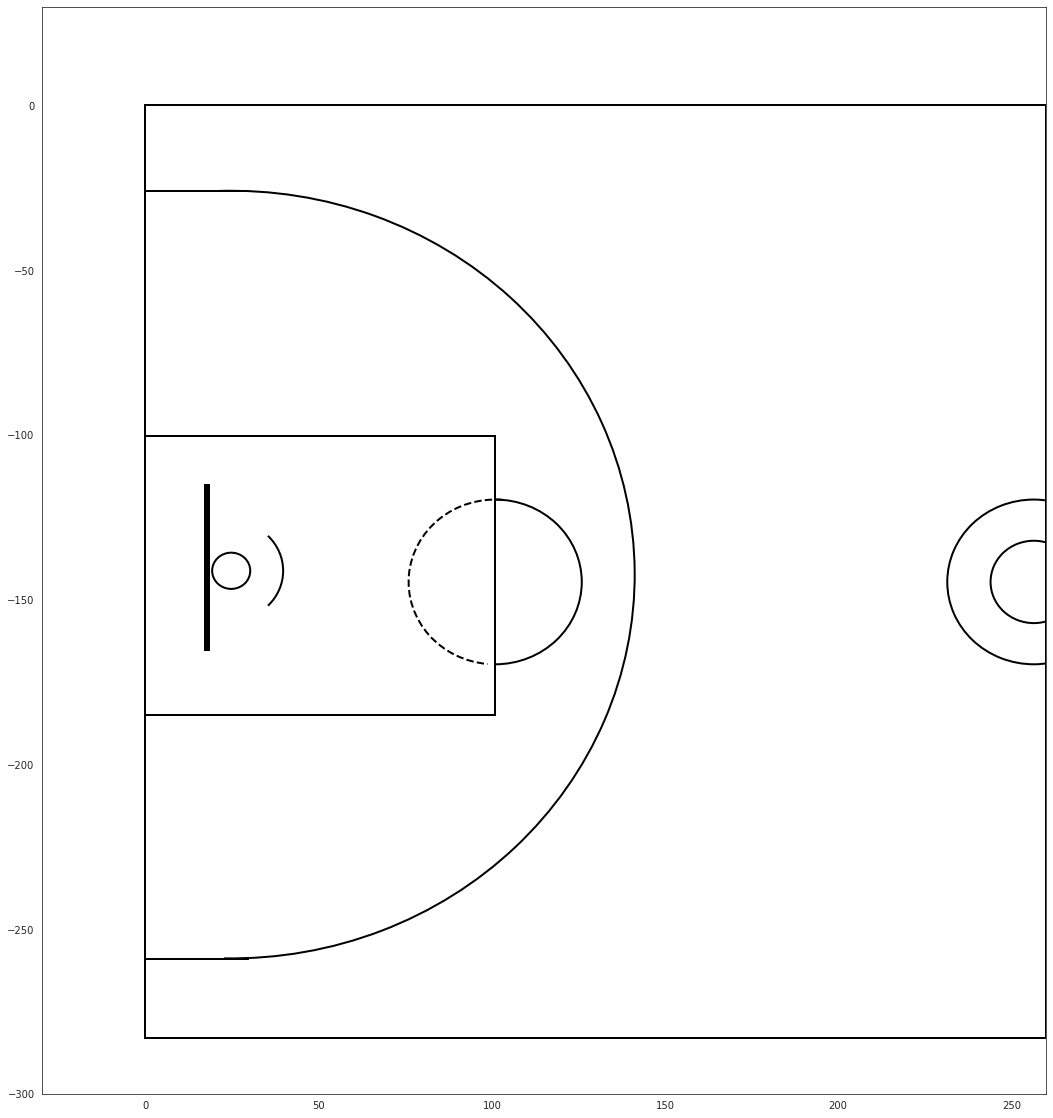

In [190]:
plt.figure(figsize=(18,20))
draw_court(outer_lines=True)
plt.xlim(-30,260)
plt.ylim(-300,30)
plt.show()

In [208]:
tiros = pd.read_csv("database_shots.csv")

In [209]:
tiros

,Unnamed: 0,name,jornada,shot,coord_x,coord_y
0,0,J. Zyskowski,2,#local-in,24.750000,126.416664
1,1,J. Zyskowski,2,#local-in,24.750000,23.883333
2,2,J. Zyskowski,2,#local-out,25.705345,23.883333
3,3,J. Zyskowski,2,#local-in,27.616035,137.866670
4,4,J. Zyskowski,2,#local-in,27.128998,129.816670
...,...,...,...,...,...,...
31572,31572,J. Dee,29,#visitor-out,32.850006,255.866670
31573,31573,J. Dee,29,#visitor-in,158.993040,67.750000
31574,31574,J. Dee,29,#visitor-out,161.147250,93.166664
31575,31575,J. Dee,29,#visitor-in,153.111110,222.383330


In [210]:
tiros["coord_x"] = pd.to_numeric(tiros["coord_x"], downcast="float")
tiros["coord_y"] = pd.to_numeric(tiros["coord_y"], downcast="float")
tiros["coord_y"] = tiros["coord_y"] * (-1)

In [216]:
jaycee = tiros[tiros["name"] == "J. Carroll"]

In [217]:
jaycee1 = pd.DataFrame(jaycee, columns = ['name', "shot", 'coord_x','coord_y'])
jaycee1.shot = jaycee1.shot.apply(lambda x: 'in' if 'in' in x else x)
jaycee1.shot = jaycee1.shot.apply(lambda x: 'in' if 'dunk' in x else x)
jaycee1.shot = jaycee1.shot.apply(lambda x: 'out' if 'out' in x else x)

In [218]:
jaycee1

,name,shot,coord_x,coord_y
567,J. Carroll,out,132.291916,-220.383331
568,J. Carroll,out,110.787277,-240.250000
569,J. Carroll,in,38.799194,-259.549988
3262,J. Carroll,in,45.842525,-160.949997
3263,J. Carroll,out,24.750000,-258.433319
...,...,...,...,...
30546,J. Carroll,out,92.868164,-189.133331
30547,J. Carroll,in,36.652649,-143.800003
30548,J. Carroll,out,43.808380,-150.566666
30549,J. Carroll,out,145.281036,-216.666672


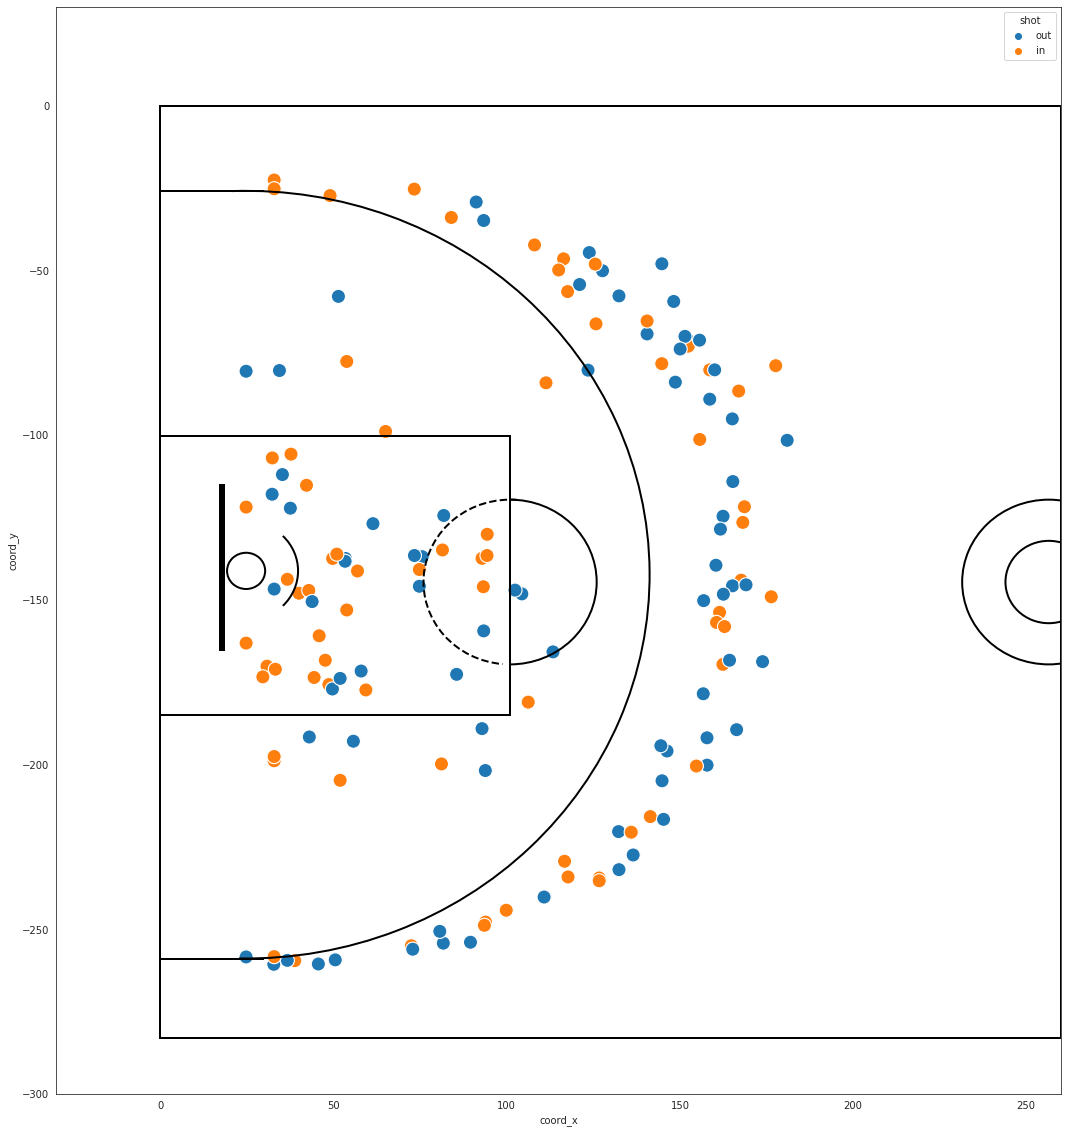

In [222]:
plt.figure(figsize=(18,20))
draw_court(outer_lines=True)
plt.xlim(-30,260)
plt.ylim(-300,30)
markers = {"#local-in": "s", "#local-out": "x"}
sns.scatterplot(data = jaycee1, x = "coord_x", y = "coord_y", s = 200,  hue = "shot")
plt.show()

In [ ]:
jaycee["col"] = 2 * df["col"]

### MPLSOCCER

In [239]:
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt

In [240]:
df = pd.read_csv("./data/final_average_stats.csv")
df.drop(columns = ["Unnamed: 0", "#"], inplace = True)

In [241]:
df.rename(columns = {"Pos": "POS", "Height": "HEIGHT", "Weight": "WEIGHT", "Age": "AGE", "zona5attempted": "zona5_attempted"}, inplace = True)

In [242]:
df['HEIGHT'] = df['HEIGHT'].str.replace('-','.')
df["HEIGHT"] = pd.to_numeric(df["HEIGHT"], downcast="float")
df["HEIGHT"] = df["HEIGHT"] * 0.3048

In [243]:
df.head()

,PLAYER_NAME,Team,GP,MIN,FGM,FGA,FG%,3PM,3PA,3P%,...,zona8_attempted,zona8_made,zona9_attempted,zona9_made,zona10_attempted,zona10_made,zona11_attempted,zona11_made,zona12_attempted,zona12_made
0,A.J. Slaughter,GCN,22,24.3,5.0,10.2,0.484,1.7,4.2,0.402,...,32.0,13.0,16.0,7.0,8.0,5.0,5.0,4.0,3.0,1.0
1,Aaron Doornekamp,CAN,31,25.6,2.6,6.1,0.431,2.0,4.6,0.441,...,31.0,13.0,4.0,1.0,25.0,16.0,8.0,2.0,6.0,4.0
2,Aaron Jones,BBB,8,19.7,1.6,3.9,0.419,0.4,1.0,0.375,...,4.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,Achille Polonara,CAJ,33,26.5,4.2,8.8,0.479,1.4,4.1,0.341,...,39.0,12.0,7.0,3.0,14.0,3.0,5.0,3.0,2.0,1.0
4,Adam Hanga,FCB,31,16.1,2.2,3.7,0.578,1.1,2.0,0.541,...,19.0,9.0,2.0,2.0,6.0,3.0,2.0,1.0,5.0,1.0


In [244]:
for i in range(1, 13):
    df[f"% ZONA{i}"] = df[f"zona{i}_made"] / df[f"zona{i}_attempted"]

In [245]:
delete_list = []
for i in df.columns:
    if "zona" in i:
        delete_list.append(i)

In [246]:
df.drop(columns = delete_list, inplace = True)

In [247]:
df.fillna(0, inplace = True)

In [248]:
df

,PLAYER_NAME,Team,GP,MIN,FGM,FGA,FG%,3PM,3PA,3P%,...,% ZONA3,% ZONA4,% ZONA5,% ZONA6,% ZONA7,% ZONA8,% ZONA9,% ZONA10,% ZONA11,% ZONA12
0,A.J. Slaughter,GCN,22,24.3,5.0,10.2,0.484,1.7,4.2,0.402,...,0.285714,0.333333,0.375000,0.583333,0.473684,0.406250,0.437500,0.625000,0.80,0.333333
1,Aaron Doornekamp,CAN,31,25.6,2.6,6.1,0.431,2.0,4.6,0.441,...,0.375000,0.250000,0.448276,0.555556,0.363636,0.419355,0.250000,0.640000,0.25,0.666667
2,Aaron Jones,BBB,8,19.7,1.6,3.9,0.419,0.4,1.0,0.375,...,0.000000,0.000000,0.000000,0.333333,0.555556,0.250000,0.000000,1.000000,0.00,0.000000
3,Achille Polonara,CAJ,33,26.5,4.2,8.8,0.479,1.4,4.1,0.341,...,0.500000,0.333333,0.400000,0.477273,0.600000,0.307692,0.428571,0.214286,0.60,0.500000
4,Adam Hanga,FCB,31,16.1,2.2,3.7,0.578,1.1,2.0,0.541,...,0.500000,0.666667,0.650000,0.571429,0.642857,0.473684,1.000000,0.500000,0.50,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Yannick Nzosa,UNI,23,12.5,1.9,3.0,0.647,0.0,0.0,0.000,...,0.000000,0.000000,0.000000,0.708333,0.533333,0.000000,0.000000,0.000000,0.00,0.000000
280,Youssoupha Fall,CAJ,27,12.2,2.4,3.9,0.613,0.0,0.0,0.000,...,0.000000,0.000000,0.000000,0.586957,0.553191,0.000000,0.000000,0.000000,0.00,0.000000
281,Youssoupha Ndoye,BETIS,34,21.0,3.7,6.5,0.563,0.0,0.1,0.000,...,0.000000,0.615385,0.000000,0.569444,0.500000,0.500000,0.285714,0.000000,0.00,0.000000
282,Ziga Samar,MON,32,10.0,1.3,2.8,0.451,0.2,1.0,0.226,...,0.000000,0.250000,0.250000,0.470588,0.640000,0.428571,0.571429,0.000000,0.00,0.000000


In [253]:
# parameter names of the statistics we want to show
params = ["% ZONA1", "% ZONA2", "% ZONA3", "% ZONA4", "% ZONA5",
          "% ZONA6", "% ZONA7", "% ZONA8", "% ZONA9", "% ZONA10", "% ZONA11", "% ZONA12"]

# The lower and upper boundaries for the statistics
low =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
high = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [303]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*12,
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [304]:
URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

In [305]:
shots_per_zone = df[["PLAYER_NAME", "% ZONA1", "% ZONA2", "% ZONA3", "% ZONA4", "% ZONA5","% ZONA6", "% ZONA7", "% ZONA8", "% ZONA9", "% ZONA10", "% ZONA11", "% ZONA12"]]

In [306]:
shots_per_zone

,PLAYER_NAME,% ZONA1,% ZONA2,% ZONA3,% ZONA4,% ZONA5,% ZONA6,% ZONA7,% ZONA8,% ZONA9,% ZONA10,% ZONA11,% ZONA12
0,A.J. Slaughter,0.000,1.000000,0.285714,0.333333,0.375000,0.583333,0.473684,0.406250,0.437500,0.625000,0.80,0.333333
1,Aaron Doornekamp,0.375,0.266667,0.375000,0.250000,0.448276,0.555556,0.363636,0.419355,0.250000,0.640000,0.25,0.666667
2,Aaron Jones,0.000,0.000000,0.000000,0.000000,0.000000,0.333333,0.555556,0.250000,0.000000,1.000000,0.00,0.000000
3,Achille Polonara,0.500,0.444444,0.500000,0.333333,0.400000,0.477273,0.600000,0.307692,0.428571,0.214286,0.60,0.500000
4,Adam Hanga,1.000,0.750000,0.500000,0.666667,0.650000,0.571429,0.642857,0.473684,1.000000,0.500000,0.50,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Yannick Nzosa,0.000,0.000000,0.000000,0.000000,0.000000,0.708333,0.533333,0.000000,0.000000,0.000000,0.00,0.000000
280,Youssoupha Fall,0.000,0.000000,0.000000,0.000000,0.000000,0.586957,0.553191,0.000000,0.000000,0.000000,0.00,0.000000
281,Youssoupha Ndoye,0.000,0.166667,0.000000,0.615385,0.000000,0.569444,0.500000,0.500000,0.285714,0.000000,0.00,0.000000
282,Ziga Samar,0.000,0.666667,0.000000,0.250000,0.250000,0.470588,0.640000,0.428571,0.571429,0.000000,0.00,0.000000


In [307]:
trimble_values = shots_per_zone[shots_per_zone["PLAYER_NAME"] == "Melo Trimble"]
mirotic_values = shots_per_zone[shots_per_zone["PLAYER_NAME"] == "Nikola Mirotic"]

In [308]:
trimble_values = trimble_values.values.tolist()
trimble_values = trimble_values[0][1:]
mirotic_values = mirotic_values.values.tolist()
mirotic_values = mirotic_values[0][1:]

In [309]:
trimble_values

[0.0,
 0.3333333333333333,
 0.2222222222222222,
 0.16666666666666666,
 0.41818181818181815,
 0.5617977528089888,
 0.4605263157894737,
 0.32608695652173914,
 0.5,
 0.36363636363636365,
 1.0,
 0.3333333333333333]

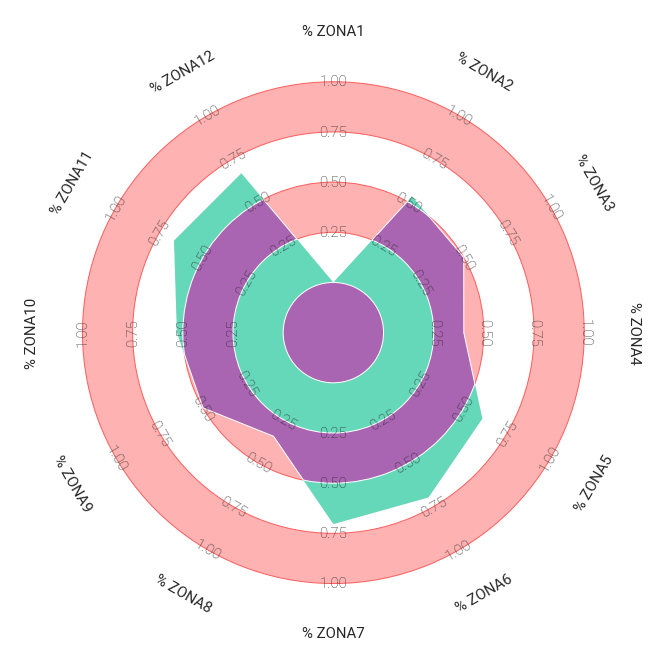

In [311]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(mirotic_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)  # draw the param labels